In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [3]:
path = ("C:/Users/adeat/Desktop/Project/Class/Tensorflow/utf-8''mnist.npz")

In [4]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs = {}):
        if(logs.get('loss') < 0.03):
            print("\n Reached 99% accuracy")
            self.model.stop_training = True

callbacks = myCallback()

In [5]:
mnist = tf.keras.datasets.mnist

In [6]:
(training_images, training_labels), (testing_images, testing_label) = mnist.load_data(path)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238  70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254 141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 254 254 254  34   

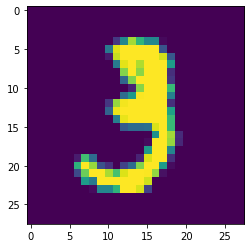

In [9]:
np.set_printoptions(linewidth=200)
plt.imshow(training_images[10])
print(training_images[10])
print(training_labels[10])

In [10]:
training_images = training_images / 255.0
testing_images = testing_images / 255.0

In [11]:
model = tf.keras.Sequential([
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(128, activation = tf.nn.relu),
            tf.keras.layers.Dense(10, activation = tf.nn.softmax)
])

In [12]:
model.compile(optimizer = 'adam', loss= 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [14]:
model.fit(training_images, training_labels, epochs = 10, callbacks=[callbacks])

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2581 - accuracy: 0.9258
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1141 - accuracy: 0.9657
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0772 - accuracy: 0.9771
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0571 - accuracy: 0.9824
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0430 - accuracy: 0.9869
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0350 - accuracy: 0.9887
Epoch 7/10
1859/1875 [============================>.] - ETA: 0s - loss: 0.0272 - accuracy: 0.9916
 Reached 99% accuracy
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0274 - accuracy: 0.9915


In [16]:
model.evaluate(testing_images, testing_label)

313/313 [==============================] - 1s 2ms/step - loss: 0.0756 - accuracy: 0.9769


[0.07559435069561005, 0.9768999814987183]

In [22]:
classification = model.predict(testing_images)
print(classification[0])
print(testing_label[0])

[5.5745268e-08 1.7490672e-09 3.0162434e-07 2.7019143e-04 8.2545293e-13 1.5080025e-06 5.5970965e-14 9.9970573e-01 2.8310525e-08 2.2161541e-05]
7


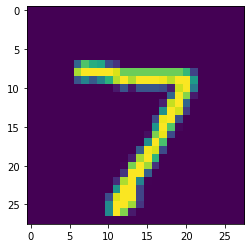

In [23]:
plt.imshow(testing_images[0])